# Ejemplo para leer un csv utilizando csv

En este ejemplo veremos como cargar un archivo csv y guardarlo en una lista o guardarlo en un diccionario y hacer un gráfico.  

Pasos previos:  
1. Para esto tomaré los datos del censo de Chile descargados de [aquí](http://www.censo2017.cl/descargue-aqui-resultados-de-comunas/)
2. Voy a tomar los datos del resultado sexo/edad. Iré a la segunda hoja del excel en excel copiaré los datos y los voy a guardar en un archivo separado por comas llamado censo.csv.

En el ejercicio:  

1. Tomaré los datos desde censo.csv
2. Graficaré el total por región de hombres y mujeres



##### Comenzamos cargando la libreria [csv](https://docs.python.org/3/library/csv.html) y de la libreria [matplotlib](https://matplotlib.org/) solo el paquete [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) y ocuparemos [numpy](https://numpy.org/) para algunos calculos en la generación de la gráfica.  


Para no tener que llamar a las funciones de `matplotlib.pyplot` de forma extensa:  
Por ejemplo para graficar tendríamos que escribir `matplotlib.pyplot.plot`, le pondremos un alias a `matplotlib.pyplot`,  

Por consenso ese alias es `plt` de esta manera si queremos hacer un gráfico bastaria con escribir `plt.plot` en vez de `matplotlib.pyplot.plot`. Lo mismo con numpy

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

###### Ahora leeremos un archivo que esta alojado en la carpeta data

si lo escribieramos en castellano sería:  

con abrir('data/censo.csv') como archivo_csv:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;leer = csv.lector(archivo_csv, delimitador=',')...

In [2]:
#definimos variables de almacenamiento
#guardaremos los nombres de las columnas en este arreglo
# para efectos practicos veremos el nombre de las columnas aunque ya las conocemos
columnas=[]

with open('data/censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for row in lector:
        if contador==0:
            columnas=row
            contador=1;
            


In [3]:
columnas

['ORDEN',
 'NOMBRE REGIÓN',
 'Código Región',
 'NOMBRE PROVINCIA',
 'Código Provincia',
 'NOMBRE COMUNA',
 'Código Comuna',
 'Edad',
 'Hombres',
 'Mujeres',
 'TOTAL']

Podemos ver que me interesa el nombre de la región que serian los datos por fila alojados en `row[1]` y me interesa hombres y mujeres que vendrían siendo `row[8]` y `row[9]` respectivamente  

Entonces repetimos el código anterior, pero ahora crearemos una estructura de datos que nos permita guardar los mismos, para esto utilizaremos un diccionario donde iremos acumulando los valores por región
  
Por ejemplo:  

`data['Arica y Parinacota']['Mujeres']`


In [4]:
data={}

with open('data/censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for row in lector:
        if contador==0:
            contador=1;
        else:
            data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+row[9]
            data[row[1]]['Hombres']=data[row[1]]['Hombres']+row[8]
            


KeyError: 'PAÍS'

Como podemos ver esto me da un error, entonces podemos trabajar con `try` `except` para manipular el error

In [5]:
data={}

with open('data/censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for row in lector:
        if contador==0:
            contador=1;
        else:
            try:
                data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+int(row[9])
                data[row[1]]['Hombres']=data[row[1]]['Hombres']+int(row[8])
            except KeyError:
                data[row[1]]={'Hombres':0, 'Mujeres': 0}
                data[row[1]]['Mujeres']=int(row[9])
                data[row[1]]['Hombres']=int(row[8])
            


In [6]:
data

{'PAÍS': {'Hombres': 17203978, 'Mujeres': 17944028},
 'ARICA Y PARINACOTA': {'Hombres': 225162, 'Mujeres': 226974},
 'TARAPACÁ': {'Hombres': 335586, 'Mujeres': 325530},
 'ANTOFAGASTA': {'Hombres': 630028, 'Mujeres': 585040},
 'ATACAMA': {'Hombres': 288840, 'Mujeres': 283496},
 'COQUIMBO': {'Hombres': 737548, 'Mujeres': 777624},
 'VALPARAÍSO': {'Hombres': 1760430, 'Mujeres': 1871374},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 6924534, 'Mujeres': 7301082},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 907420,
  'Mujeres': 921690},
 'MAULE': {'Hombres': 1023248, 'Mujeres': 1066652},
 'BIOBÍO': {'Hombres': 1966634, 'Mujeres': 2108194},
 'LA ARAUCANÍA': {'Hombres': 930262, 'Mujeres': 984186},
 'LOS RÍOS': {'Hombres': 377694, 'Mujeres': 391980},
 'LOS LAGOS': {'Hombres': 818800, 'Mujeres': 838616},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 107294,
  'Mujeres': 99022},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 170498,
  'Mujeres': 162568}}

Como podemos ver tenemos total país con muchas mujeres y muchos hombres, esto se debe a que hay un total comuna y total país en la plantilla [censo.csv](data/censo.csv). Además el ejercicio debe considerar el total regional y no el total país así que debemos eliminar esto de nuestro diccionario en un futuro.

Entonces debemos filtrar nuestros datos y cuando en edad (`row[7]`) encontremos la palabra Total debemos saltar esa fila. Hay varias formas de programar esto, una de ellas es la siguiente.


In [7]:
data={}
#agregamos el string total
total="Total"

with open('data/censo.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for row in lector:
        if contador==0:
            contador=1;
        else:
            if total in row[7]:
                print("Me salto línea de "+row[5]+" que nos dice "+row[7]+" con total hombres:"+ row[8] + " total mujeres:"+row[9])
            else:
                try:
                    data[row[1]]['Mujeres']=data[row[1]]['Mujeres']+int(row[9])
                    data[row[1]]['Hombres']=data[row[1]]['Hombres']+int(row[8])
                except KeyError:
                    data[row[1]]={'Hombres':0, 'Mujeres': 0}
                    data[row[1]]['Mujeres']=int(row[9])
                    data[row[1]]['Hombres']=int(row[8])
            

            

Me salto línea de PAÍS que nos dice Total País con total hombres:8601989 total mujeres:8972014
Me salto línea de ARICA que nos dice Total Comunal con total hombres:109389 total mujeres:111975
Me salto línea de CAMARONES que nos dice Total Comunal con total hombres:726 total mujeres:529
Me salto línea de PUTRE que nos dice Total Comunal con total hombres:2054 total mujeres:711
Me salto línea de GENERAL LAGOS que nos dice Total Comunal con total hombres:412 total mujeres:272
Me salto línea de IQUIQUE que nos dice Total Comunal con total hombres:94897 total mujeres:96571
Me salto línea de ALTO HOSPICIO que nos dice Total Comunal con total hombres:54206 total mujeres:54169
Me salto línea de POZO ALMONTE que nos dice Total Comunal con total hombres:8987 total mujeres:6724
Me salto línea de CAMIÑA que nos dice Total Comunal con total hombres:657 total mujeres:593
Me salto línea de COLCHANE que nos dice Total Comunal con total hombres:995 total mujeres:733
Me salto línea de HUARA que nos dice

In [8]:
data

{'PAÍS': {'Hombres': 8601989, 'Mujeres': 8972014},
 'ARICA Y PARINACOTA': {'Hombres': 112581, 'Mujeres': 113487},
 'TARAPACÁ': {'Hombres': 167793, 'Mujeres': 162765},
 'ANTOFAGASTA': {'Hombres': 315014, 'Mujeres': 292520},
 'ATACAMA': {'Hombres': 144420, 'Mujeres': 141748},
 'COQUIMBO': {'Hombres': 368774, 'Mujeres': 388812},
 'VALPARAÍSO': {'Hombres': 880215, 'Mujeres': 935687},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 3462267, 'Mujeres': 3650541},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 453710,
  'Mujeres': 460845},
 'MAULE': {'Hombres': 511624, 'Mujeres': 533326},
 'BIOBÍO': {'Hombres': 983317, 'Mujeres': 1054097},
 'LA ARAUCANÍA': {'Hombres': 465131, 'Mujeres': 492093},
 'LOS RÍOS': {'Hombres': 188847, 'Mujeres': 195990},
 'LOS LAGOS': {'Hombres': 409400, 'Mujeres': 419308},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 53647,
  'Mujeres': 49511},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 85249, 'Mujeres': 81284}}

Ahora podemos ver que efectivamente tenemos aprox: 18 millones de habitantes.  

Borramos de nuestro diccionario a PAÍS

In [9]:
del data['PAÍS']

In [10]:
data

{'ARICA Y PARINACOTA': {'Hombres': 112581, 'Mujeres': 113487},
 'TARAPACÁ': {'Hombres': 167793, 'Mujeres': 162765},
 'ANTOFAGASTA': {'Hombres': 315014, 'Mujeres': 292520},
 'ATACAMA': {'Hombres': 144420, 'Mujeres': 141748},
 'COQUIMBO': {'Hombres': 368774, 'Mujeres': 388812},
 'VALPARAÍSO': {'Hombres': 880215, 'Mujeres': 935687},
 'METROPOLITANA DE SANTIAGO': {'Hombres': 3462267, 'Mujeres': 3650541},
 "LIBERTADOR GENERAL BERNARDO O'HIGGINS": {'Hombres': 453710,
  'Mujeres': 460845},
 'MAULE': {'Hombres': 511624, 'Mujeres': 533326},
 'BIOBÍO': {'Hombres': 983317, 'Mujeres': 1054097},
 'LA ARAUCANÍA': {'Hombres': 465131, 'Mujeres': 492093},
 'LOS RÍOS': {'Hombres': 188847, 'Mujeres': 195990},
 'LOS LAGOS': {'Hombres': 409400, 'Mujeres': 419308},
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': {'Hombres': 53647,
  'Mujeres': 49511},
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA': {'Hombres': 85249, 'Mujeres': 81284}}


## Ahora graficaremos la data  

Para esto, crearemos una figura de plt llamada `fig` y los ejes llamados `ax`

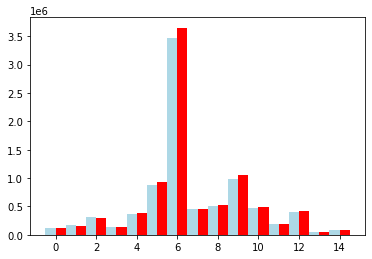

In [11]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha

barraH = ax.bar(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.bar(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")



Nuestra grafica se ve bien, pero nos queda agregar información, como títulos, Puntajes, Grupos y Género
  
Agreguemos esta info al plot

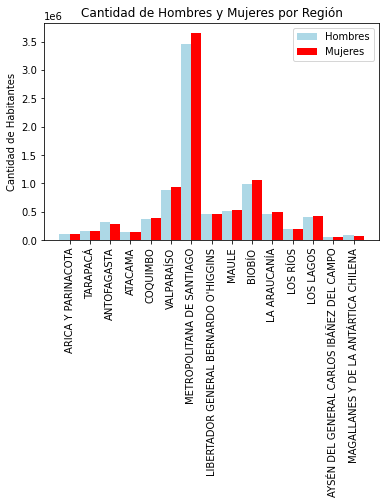

In [12]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha

barraH = ax.bar(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.bar(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")



#Pondremos nombre a nuestro eje de las ordenadas
ax.set_ylabel('Cantidad de Habitantes')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_xticks(ejeX)
#Agregaremos las etiquetas al eje de las abscisas

ax.set_xticklabels(etiquetas, rotation=90)

#Agregaremos la leyenda de las barras
ax.legend()


##### Como podemos ver el gráfico mejoro bastante, sin embargo es muy dificil leer las etiquetas de las regiones, por lo que haremos un grafico de barra vertical

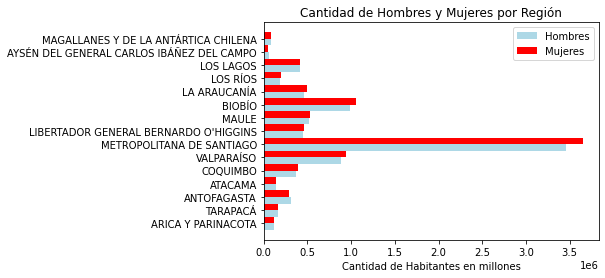

In [13]:
fig,ax = plt.subplots()

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha
# Cambiamos bar por barh para tener una barra horizontal

barraH = ax.barh(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.barh(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")

# Ahora debemos cambiar las anotaciones del eje "y" por el "x" y viceversa.


#Pondremos nombre a nuestro eje de las abscisas
ax.set_xlabel('Cantidad de Habitantes en millones')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_yticks(ejeX)
#Agregaremos las etiquetas al eje de las ordenadas

ax.set_yticklabels(etiquetas)

#Agregaremos la leyenda de las barras
ax.legend()


##### Nuestro grafico ha mejorado bastante, ahora le ampliaremos el tamaño

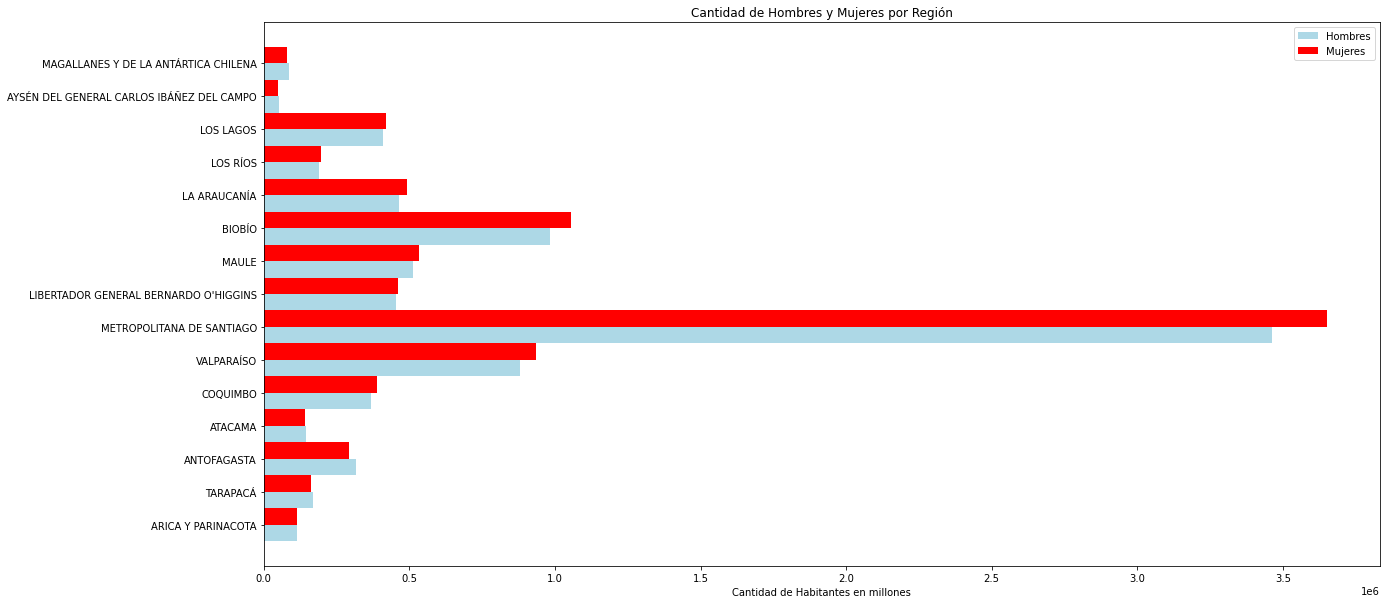

In [14]:
fig,ax = plt.subplots(figsize=(20,10))

#nuestras etiquetas serán las regiones, es decir las key de data pero entregadas como lista
etiquetas=list(data.keys())

#Ahora generamos una lista con todos los valores de los hombres y mujeres por región 
hombres=[]
mujeres=[]
for etiqueta in etiquetas:
    hombres.append(data[etiqueta]['Hombres'])
    mujeres.append(data[etiqueta]['Mujeres'])

    
   
# Tenemos que definir la posición de las etiquetas en la gráfica o quedará todo desordenado 
#y además como dividir el eje para cada barra

ejeX = np.arange(len(etiquetas))


# Tenemos que hacer dos barras  que serán la cantidad de hombres y mujeres, 
#para esto definiremos el ancho de cada barra

ancho=0.5

#la primera barra irá en la mitad de la izquierda y la segunda en la mitad de la derecha
# Cambiamos bar por barh para tener una barra horizontal

barraH = ax.barh(ejeX - ancho/2, hombres, ancho, label='Hombres',color="lightblue")
barraM = ax.barh(ejeX + ancho/2, mujeres, ancho, label='Mujeres',color="red")

# Ahora debemos cambiar las anotaciones del eje "y" por el "x" y viceversa.


#Pondremos nombre a nuestro eje de las abscisas
ax.set_xlabel('Cantidad de Habitantes en millones')
#Pondremos un título
ax.set_title('Cantidad de Hombres y Mujeres por Región')
#Agregaremos a cada par de barras un nombre
ax.set_yticks(ejeX)
#Agregaremos las etiquetas al eje de las ordenadas

ax.set_yticklabels(etiquetas)

#Agregaremos la leyenda de las barras
ax.legend()
